运用高斯核和线性核分别训练一个SVM

引入需要使用的库

In [223]:
from sklearn import svm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

处理数据

In [224]:
def load_data(x_train,y_train):
    train_data = []
    train_feature = []
    for x,y in zip(x_train,y_train):
        x=list(x)
        line = []
        for j in range(2):
            line.append(x[j])
        train_data.append(line)
        train_feature.append(y)
    return train_data,train_feature #返回两个列表，分别存储训练集中的特征和标签

绘制原始数据散点图

In [225]:
def plot_scatter(xtrain,ytrain):
    #原始数据的绘制（此时得到图1）
    for x,y in zip(xtrain,ytrain):
        if y == 1:
            s1 = plt.scatter(x[0],x[1],color='red')             #绘制出类别0和类别1
        else:
            s2 = plt.scatter(x[0],x[1],color='blue')      #绘制出类别0和类别1
    plt.legend((s1,s2),('positive','negative'))

绘制线性核超平面与支持向量

In [226]:
def plot_support_vector(xtrain,ytrain,model):

    w = model.coef_[0]#方向向量W
    b = model.intercept_[0]#截距项b
    '''
    for j in Support_vector_index:#绘制支持向量
        if ytrain[j] == 1: 
            plt.scatter(xtrain[j][0],xtrain[j][1], color='red',s=100, alpha=0.5, linewidth=1.5, edgecolor='red')
        if ytrain[j] == 0: 
            plt.scatter(xtrain[j][0],xtrain[j][1], color='blue',s=100, alpha=0.5, linewidth=1.5, edgecolor='blue')
    '''
            
    #对于方向向量和截距项进行处理，绘制超平面和支持向量
    plot_scatter(xtrain,ytrain)
    k = -w[0] / w[1]
    b1 = -b / w[1]
    b2 = (1-b) / w[1]
    b3 = (-1-b) / w[1]
    x = np.linspace(0.5, 1, 10)
    y1 = k * x + b1
    y2 = k * x + b2
    y3 = k * x + b3
    plt.plot(x, y1, label = 'hyperplane')
    plt.plot(x, y2, label = 'support vector_1')
    plt.plot(x, y3, label = 'support vector_2')
    plt.legend()

线性核训练SVM

In [227]:
def linear(xtrain,ytrain,xtest,ytest):
    linear_svm = svm.LinearSVC(C=10, class_weight='balanced',max_iter = 10000)
    linear_svm.fit(xtrain,ytrain)

    predict_linear = []#存储线性核SVM对于验证集的预测
    for i in xtest:
        i=np.array(i).reshape(1, -1)
        predict_linear.append(float(linear_svm.predict(i)))
    
    print("线性核数据集的准确率：", linear_svm.score(xtrain, ytrain))
    print('线性核验证集的准确率为：{}'.format(accuracy_score(y_pred=predict_linear, y_true=ytest)))

    #绘制超平面
    plt.figure(2)
    plot_support_vector(xtrain,ytrain,linear_svm)
    plt.title('Linear-train')

    plt.figure(3)
    plot_scatter(xtest,ytest)
    plot_support_vector(xtest,ytest,linear_svm)
    plt.title('Linear-test')
    
    plt.show()

高斯核训练SVM

In [228]:
def gauss(xtrain,ytrain,xtest,ytest):
    gauss_svm = svm.SVC(C=5, kernel='rbf', class_weight='balanced')
    gauss_svm.fit(xtrain, ytrain)
    
    predict_gauss = []#存储高斯核SVM对于验证集的预测
    for i in xtest:
        i=np.array(i).reshape(1, -1)
        predict_gauss.append(float(gauss_svm.predict(i)))
    print("高斯核数据集的准确率：", gauss_svm.score(xtrain, ytrain))
    print('高斯核验证集的准确率: %s' % (accuracy_score(y_pred=predict_gauss, y_true=ytest)))
    n_Support_vector = gauss_svm.n_support_#支持向量个数
    print("支持向量个数为： ",n_Support_vector)
    '''
    #绘制超平面
    plot_scatter(xtrain,ytrain)
    plot_support_vector(xtrain,ytrain,gauss_svm)
    plt.title('高斯核')
    plt.show()
    '''
    ax = plt.subplot(111, projection='3d')
    for x,y in zip(xtest,ytest):
        if y == 1:
            ax.scatter(x[0], x[1], y, c='r', label='pos')
        else:
            ax.scatter(x[0], x[1], y, c='b', label='neg')
    plt.show()

主函数

In [229]:
def main():
    #导入数据
    X_train = np.genfromtxt('./data/train_feature.csv', delimiter=',')
    Y_train = np.genfromtxt('./data/train_target.csv', delimiter=',')
    plt.figure(4)
    plot_scatter(X_train,Y_train)
    plt.title('Origin_Data')
    plt.show()
    #样本归一化到[-1,1]
    max_abs_scaler = preprocessing.MaxAbsScaler()
    X_train = max_abs_scaler.fit_transform(X_train)

    train_data = []
    train_feature = []
    train_data,train_feature=load_data(X_train,Y_train)
    #划分训练集和验证集
    xtrain,xtest,ytrain,ytest = train_test_split(train_data,train_feature,test_size=0.2)

    #原式数据分布图
    plt.figure(1)
    plot_scatter(xtrain,ytrain)
    plt.title('Normalized_Data')
    plt.show()
    
    #线性核处理
    linear(xtrain,ytrain,xtest,ytest)

    #高斯核处理
    gauss(xtrain,ytrain,xtest,ytest)


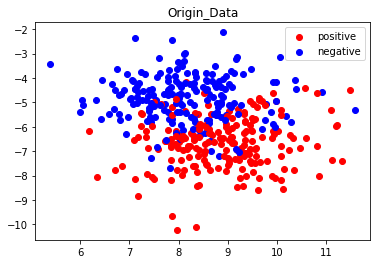

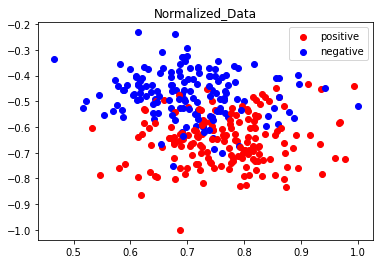

线性核数据集的准确率： 0.83125
线性核验证集的准确率为：0.85


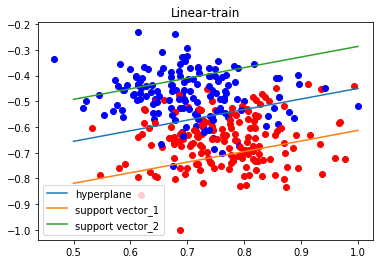

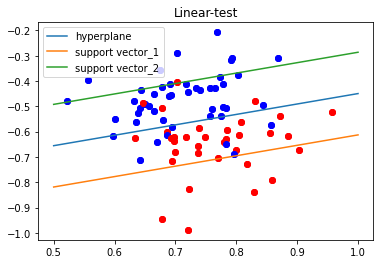

高斯核数据集的准确率： 0.828125
高斯核验证集的准确率: 0.85
支持向量个数为：  [65 75]


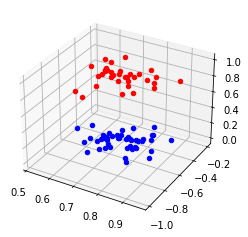

In [230]:
main()